In [8]:
import sys
sys.path.append("../dev_scripts/")
import exp_tools
import sklearn
from sklearn.preprocessing import StandardScaler
import numpy as np
from fri import bounds,plot_dendrogram_and_intervals
from fri import *
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [9]:
n = 1000

rs = np.random.RandomState(125)

X,y = exp_tools.gen_quadrant_problem_2weak(n=n,random_state=rs)

Generating dataset with d=5,n=1000,strongly=0,weakly=2, partition of weakly=None


In [106]:
from sklearn.utils import resample
import math
n_bootstraps=10
data = X, y
perc = 0.7
n = data[0].shape[0]
bs = [resample(*data, replace=True, n_samples=math.floor(perc * n),
                           random_state=rs) for bs in range(n_bootstraps)]


In [107]:
intervals = []
features = []
dist_mats = []
for X,y in bs:
    f = FRIClassification(debug=True)
    f.fit(X,y)
    intervals.append(f.interval_)
    clust, link, feat_points,dist_mat = f.community_detection2()
    features.append(feat_points)
    dist_mats.append(dist_mat/f.optim_L1_)

loss 51.4043524882
L1 7.05063948704
offset -0.0364114173854149
C 0.1
score 0.983934990243
coef:
[[ 2.18298782]
 [ 2.13600687]
 [ 0.92712301]
 [-0.92712301]
 [ 0.01353039]
 [ 0.04395731]
 [ 0.17894385]]
loss 9.16469451616
L1 16.6755217256
offset 0.026202748710699598
C 1
score 0.996428616983
coef:
[[ 4.81539839]
 [ 5.03000165]
 [ 2.3299234 ]
 [-2.32992319]
 [ 0.06853149]
 [-0.23375552]
 [ 0.35203156]]
loss 10.456185366
L1 20.840049878
offset -0.024219378626884072
C 1
score 0.971446072176
coef:
[[  6.16175810e+00]
 [  6.42228329e+00]
 [  3.05128049e+00]
 [ -3.05128045e+00]
 [  1.07911562e-11]
 [ -3.65427294e-03]
 [  2.55243278e-01]]
loss 3.75091012736e-08
L1 85.9122855116
offset -0.1358686767209598
C 100
score 0.985709904489
coef:
[[  2.56816647e+01]
 [  2.61915625e+01]
 [  1.29961565e+01]
 [ -1.29961569e+01]
 [ -2.15633341e-01]
 [  5.59625254e-04]
 [  2.03440627e-02]]
loss 8.39221248877e-09
L1 86.9056632191
offset -0.1852557496220506
C 100
score 1.0
coef:
[[ 25.88880373]
 [ 26.52528794]


In [109]:
mats = pd.DataFrame(dist_mats)

In [114]:
mats

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.034141,0.408735,0.408735,0.114194,0.110971,0.099255,0.396737,0.396737,0.100717,0.095708,...,4.165277e-14,0.385485,0.391413,0.388277,0.385485,0.391413,0.388277,0.024150,0.026553,0.018341
1,0.018046,0.398902,0.398902,0.062851,0.063753,0.058128,0.403381,0.403381,0.051538,0.045926,...,1.795167e-11,0.396841,0.396730,0.401041,0.396841,0.396730,0.401041,0.024397,0.053067,0.034732
2,0.015719,0.403874,0.403874,0.048698,0.045861,0.055111,0.409554,0.409554,0.053900,0.051453,...,8.100200e-11,0.399163,0.401272,0.401125,0.399163,0.401272,0.401125,0.010032,0.052334,0.054091
3,0.009426,0.419251,0.419251,0.051810,0.034077,0.035721,0.422673,0.422673,0.039520,0.033206,...,1.966145e-11,0.424542,0.422599,0.423842,0.424542,0.422599,0.423842,0.044701,0.042379,0.007160
4,0.010330,0.418737,0.418737,0.047973,0.034205,0.035787,0.422885,0.422885,0.039933,0.034475,...,2.835714e-11,0.423649,0.422478,0.423523,0.423649,0.422478,0.423523,0.037935,0.038630,0.006405
5,0.007674,0.424492,0.424492,0.050263,0.048480,0.044286,0.427905,0.427905,0.055403,0.057996,...,1.010978e-09,0.425376,0.427532,0.424105,0.425376,0.427532,0.424105,0.012431,0.014145,0.020773
6,0.005716,0.413012,0.413012,0.048240,0.053723,0.048484,0.416898,0.416898,0.054273,0.061177,...,8.042987e-13,0.412208,0.415019,0.410388,0.412208,0.415019,0.410388,0.031689,0.024082,0.016152
7,0.008858,0.404776,0.404776,0.049325,0.055191,0.049508,0.403782,0.403782,0.056001,0.050336,...,4.724024e-13,0.395769,0.394211,0.399215,0.395769,0.394211,0.399215,0.046970,0.018690,0.051032
8,0.010746,0.414248,0.414248,0.056255,0.039265,0.045623,0.418373,0.418373,0.046773,0.037542,...,2.664340e-11,0.416546,0.417562,0.417786,0.416546,0.417562,0.417786,0.046515,0.014974,0.042755
9,0.025524,0.416634,0.416634,0.045408,0.039596,0.035559,0.427951,0.427951,0.042288,0.057210,...,1.090613e-07,0.427902,0.415546,0.416627,0.427902,0.415546,0.416627,0.035753,0.030928,0.021603


In [112]:
mats.var()

0     8.155985e-05
1     6.458881e-05
2     6.458881e-05
3     4.217941e-04
4     5.144646e-04
5     3.534906e-04
6     1.215920e-04
7     1.215920e-04
8     3.101719e-04
9     3.293906e-04
10    2.011767e-04
11    1.186661e-15
12    2.323255e-04
13    1.755617e-04
14    1.579818e-04
15    2.323255e-04
16    1.755617e-04
17    1.579818e-04
18    1.808389e-04
19    2.096189e-04
20    2.996472e-04
dtype: float64

In [117]:
import scipy
def make_square(dist_mat):
    return = scipy.spatial.distance.squareform(dist_mat)

SyntaxError: invalid syntax (<ipython-input-117-926880c44476>, line 3)

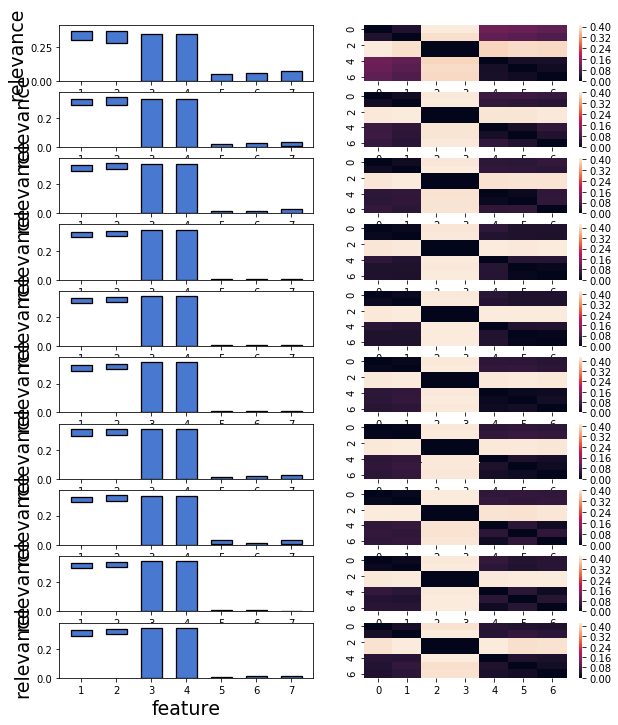

In [118]:
import seaborn as sns
from fri.plot import plot_relevance_bars
fig, axs = plt.subplots(n_bootstraps,2,figsize=(10,12))
for i,ints in enumerate(intervals):
    plot_relevance_bars(axs[i][0],ints)
    sns.heatmap(make_square(dist_mats[i]),ax=axs[i,1])

In [55]:
clust, link, feat_points,dist_mat = f.community_detection2(X,y)


In [120]:
link

array([[  2.00000000e+00,   3.00000000e+00,   6.50472448e-06,
          2.00000000e+00],
       [  5.00000000e+00,   6.00000000e+00,   1.28848362e+00,
          2.00000000e+00],
       [  0.00000000e+00,   1.00000000e+00,   1.52233490e+00,
          2.00000000e+00],
       [  4.00000000e+00,   8.00000000e+00,   1.84464048e+00,
          3.00000000e+00],
       [  9.00000000e+00,   1.00000000e+01,   2.12085234e+00,
          5.00000000e+00],
       [  7.00000000e+00,   1.10000000e+01,   2.47843502e+01,
          7.00000000e+00]])

In [56]:
import scipy
dist_mat = scipy.spatial.distance.squareform(dist_mat)

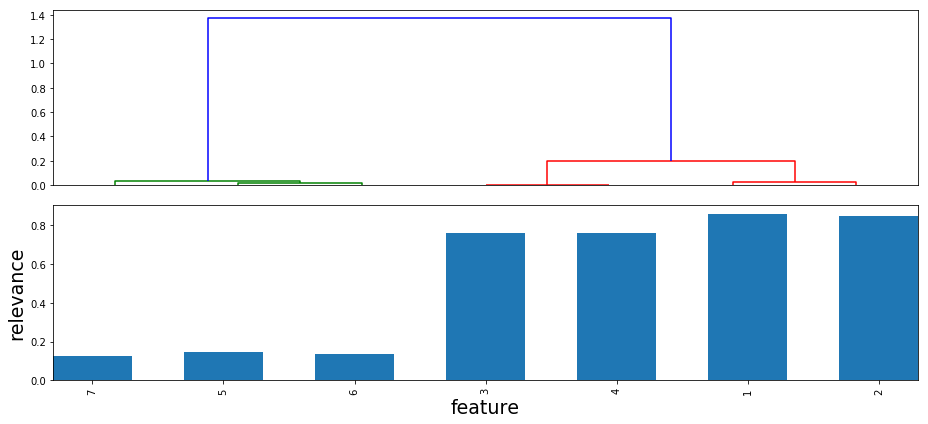

In [57]:
p = plot_dendrogram_and_intervals(f.interval_,link)

In [12]:
import pandas as pd
pd.DataFrame(X).corr()

,0,1,2,3,4,5,6
0,1.000000,0.041688,-0.013250,0.013250,0.068489,0.009713,-0.024199
1,0.041688,1.000000,0.009897,-0.009897,0.017740,0.001767,0.001497
2,-0.013250,0.009897,1.000000,-1.000000,-0.002976,0.050858,0.021815
3,0.013250,-0.009897,-1.000000,1.000000,0.002976,-0.050858,-0.021815
4,0.068489,0.017740,-0.002976,0.002976,1.000000,-0.010376,-0.000962
5,0.009713,0.001767,0.050858,-0.050858,-0.010376,1.000000,-0.047092
6,-0.024199,0.001497,0.021815,-0.021815,-0.000962,-0.047092,1.000000


In [14]:
import seaborn as sns

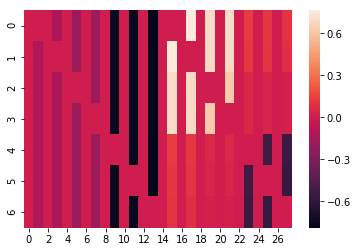

In [15]:
sns.heatmap(feat_points)

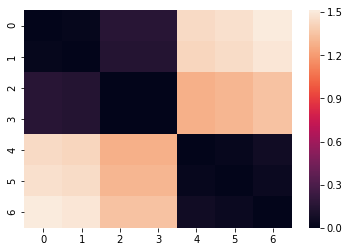

In [16]:
sns.heatmap(dist_mat)

# Distance test

In [19]:
import fri.utils

In [38]:
fri.utils.similarity2(feat_points[2],feat_points[3])

2.0524053863447112e-13

In [32]:
from scipy.spatial.distance import euclidean

In [39]:
euclidean(feat_points[2],feat_points[3])

0.9251651425164945

# Correlation based grouping

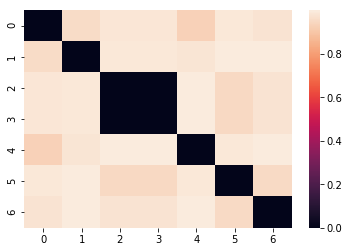

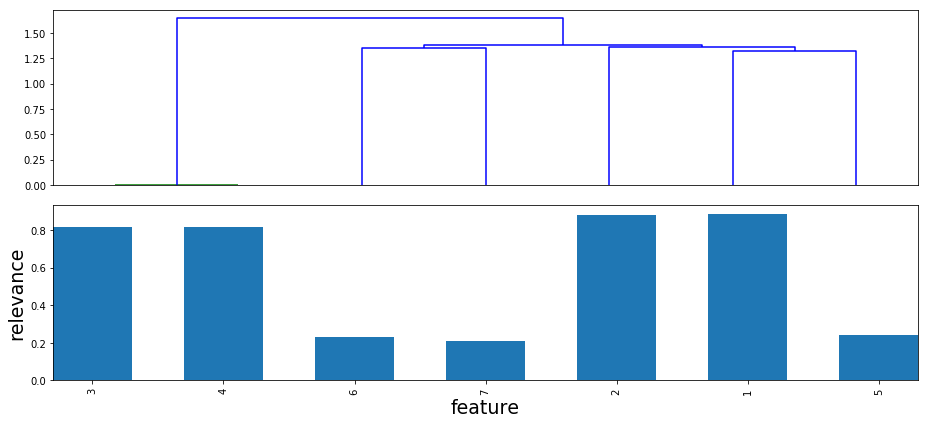

In [17]:
import pandas as pd
import seaborn as sns
corr_pd = pd.DataFrame(X).corr()

corr_pd = 1-corr_pd.abs()
corr_pd = corr_pd.values

sns.heatmap(corr_pd)

from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import linkage
z = linkage(corr_pd,method="single")
threshold = 0.55*np.max(z[:, 2])
p = plot_dendrogram_and_intervals(f.interval_,z)